In [1]:
from __future__ import division
from utils import *
from functions import *
%matplotlib inline
today = datetime.date.today()
# todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)



In [3]:
# sh.cd('/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/TRN/TRN/')
# print subprocess.check_output(['./TRN', '-T', '1000','-N', '100'])
print(DIRECTORY)

/Users/GP1514/Dropbox/0000 - PhD/figures/20151005/


In [5]:
N = 300
ext = 1
G = 3
dt =0.25
# d1 = 10000
# d2 = 150000
# d3 = 25000
d1 = 10000
d2 = 60000
d3 = 25000
before = d1
after = d2+d3
S = 70
it = 8
coeff = -300
Rm = 0.1
binsize = 2000
# runPSTH(N, G,S, it,1000, d1, d2, d3, before, after)
# h,s = readPSTH(N, G,S, it,1000, d1, d2, d3, before, after)
# plotPTSH(before, after, h, s, it, DIRECTORY, S, N)
it = 80
# ints = []
# for S in range(20,21):
#     runPSTH(N, G,10*S, it,binsize, d1, d2, d3, before, after)
#     h,s, total = readPSTH(N, G,10*S, it,binsize, d1, d2, d3, before, after)
# #     ints.append(total)
#     savePTSH(before, after, h, s, it, DIRECTORY, S*10, N)
#     extension = "_S-%d_N-%d_T-%d" % (S, N, before+after)
#     plt.savefig(DIRECTORY + extension + '_PTSH.pdf')


In [4]:
plt.bar(np.arange(-5,(len(ints)-1)*10,10), ints, 10)
plt.title('Mean spike sum')
plt.xlabel('Stimulation level [pA]')
plt.ylabel('Mean spike sum')
plt.xlim([-5,145])
plt.tight_layout()
# plt.savefig(DIRECTORY + '_spikesum.pdf')

NameError: name 'ints' is not defined

TypeError: runSimulation() missing 4 required positional arguments: 's', 'WII', 'tq', and 'thq'

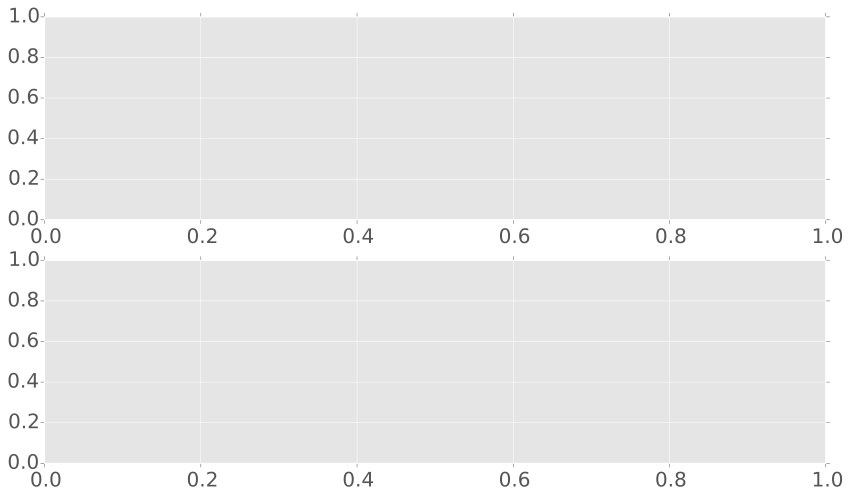

In [6]:
N = 100
ext = 1
G = 3
dt =0.25
d1 = 2000
d2 = 10000
d3 = 10000
before = d1
after = d2+d3
S = 150
it = 8
coeff = -300
Rm = 0.5

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

runSimulation(N,0, G, S, d1, d2, d3, before, after)
spikes_x, spikes_y, gamma, correlation, ssp1, stimulation = readSimulation(N,0, G, S, d1, d2, d3, before, after)
ax.plot(ssp1*10)
# plt.figure()
ron = readoutSpikes(ssp1,Rm, coeff)
ax.plot(ron*120)
# plt.figure()
ax.plot(np.arange(0, len(ron)-1,len(ron)/len(stimulation)),stimulation)
# plt.figure(figsize=(14,4))
listS = [ron]
tot = np.sum(listS, axis=0)
h = getHist(tot,1000)
ax2.bar(np.arange(0,len(ron)/1000, len(ron)/len(h)/1000),h)

<Container object of 44 artists>

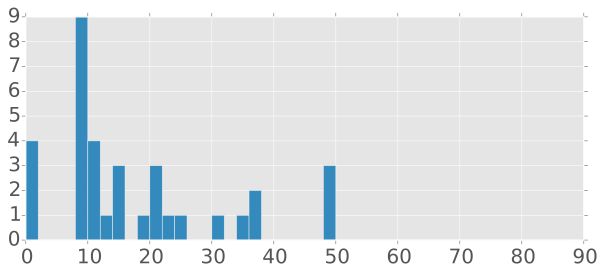

In [47]:
binsize=2000
h = getHist(tot,binsize)
plt.bar(np.arange(0,len(ron)/1000, len(ron)/len(h)/1000),h,  binsize/1000)
# plt.bar(np.arange(0,len(h) * binsize / 1000, binsize/1000),h , binsize/1000)


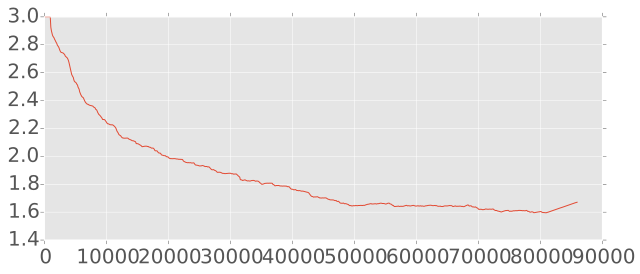

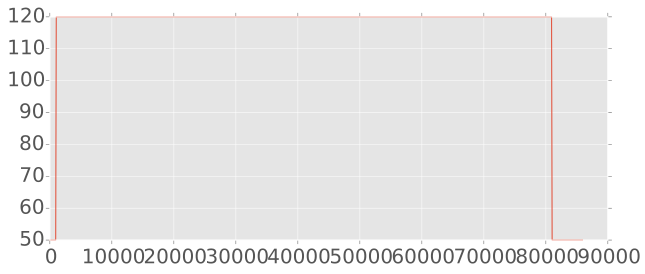

In [48]:
dt = 0.25
T = d1 + d2 + d3
x = np.arange(0,T, T/len(gamma))
x2 = np.arange(0,T, T/len(stimulation))
plt.plot(x, gamma)
plt.figure()
plt.plot(x2, stimulation)
# plt.plot(ssp1)
# plt.plot(ssp2)
# plt.figure()
# plt.plot(spikes_x,spikes_y, '.', markersize=1)


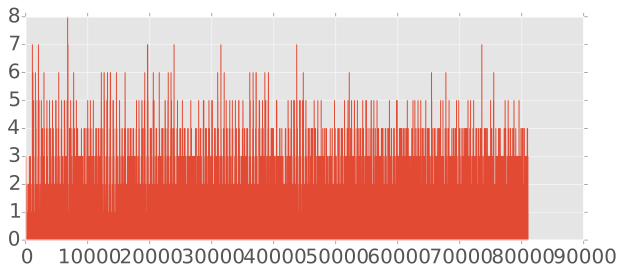

In [36]:
plt.figure()
plt.plot(ssp1)
# plt.figure()
# plt.plot(ssp2)

999
800 800
800 800


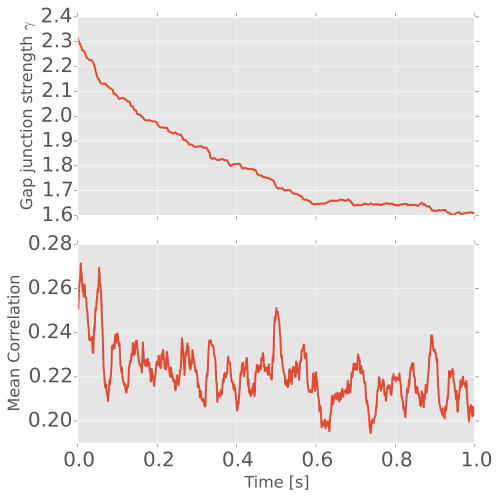

In [34]:
fontsize=16
print len(gamma)
begin = 100
end = 900
Gamma = gamma[begin:end]
Correlation = correlation[begin:end]

# PLOT GAMMA
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(211)
simT = (d1)/len(Gamma)/1000
x= np.arange(0,len(Gamma)*simT,simT)
print len(x), len(Gamma)
ax1.plot( x, Gamma,'-', linewidth=2)
# ax1.set_xticks([])
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel(r'Gap junction strength $\gamma$', fontsize=fontsize)


# # PLOT CORR
ax2  = fig.add_subplot(212)
# x= np.arange(0,Correlation.shape[0]*0.45,0.45)
np.arange(0,Correlation.shape[0]*0.45*400/3000,0.45)
print len(x), len(Correlation)
ax2.set_xlabel('Time [s]', fontsize=fontsize)
ax2.set_ylabel('Mean Correlation', fontsize = fontsize)
ax2.plot(x, np.array(Correlation)*100,'-', linewidth=2)



plt.tight_layout()


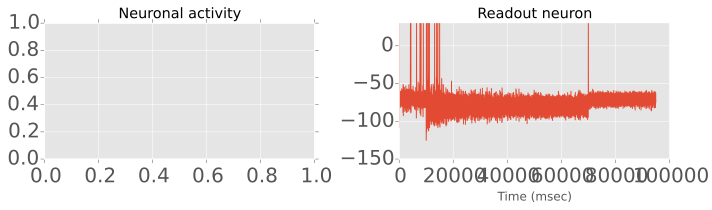

In [27]:
'''
PLOT the rasters and the membrane potential of the readout neuron for both transitions and the end of the simulation
'''

coeff = -300
Rm = 0.1

dur =1000 #duration of periods to plot
# find start and end of periods of interest
t1 = findindex(d1-before, spikes_x)
t2 = findindex(d1+after, spikes_x, t1)
# t3 = findindex(int(2*T/3)-dur, spikes_x, t2)
# t4 = findindex(int(2*T/3)+dur, spikes_x, t3)
# t5 = findindex(int(3*T/3)-2*dur, spikes_x, t4)
t6 = len(spikes_x)

# plot a 3X2 grid
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(122)
ax1 = readoutneuronTRN(ax1, ssp1, Rm, coeff, 1)
ax1.set_title('Readout neuron')
ax4=fig.add_subplot(121)
ax4.set_title('Neuronal activity')
# ax4=plotraster(ax4, spikes_x, spikes_y, t1,t6,dur)


fig.tight_layout()

In [ ]:
list1 = [1,10,2,3,10]


simulation done
RON computing done in 248.20935297
60.0 1000 0.06


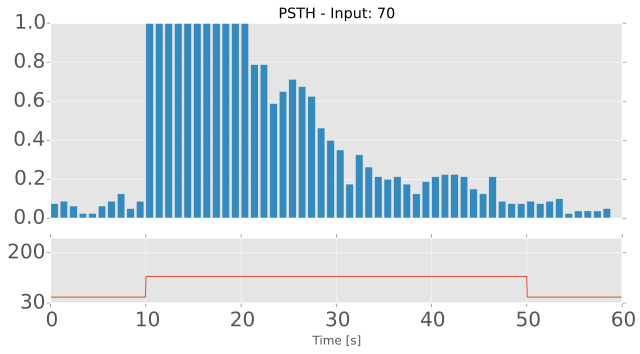

In [5]:
N = 300
ext = 1
G = 3
dt =0.25
d1 = 10000
d2 = 40000
d3 = 10000
before = 10000
after = 50000
S = 70
it = 80
start  = t.time()
runPSTH(N, G,S, it,1000, d1, d2, d3, before, after)
print "simulation done"
h,s = readPSTH(N, G,S, it,1000, d1, d2, d3, before, after)
print "RON computing done in %s" % str(t.time()-start)
# plt.plot(h)
plotPTSH(before, after, h, s, it, DIRECTORY, S, N)

In [6]:
def plotPTSH(before, after, h, s, it, DIRECTORY, S, N):
    T = before+after
    simsize=len(s)
    print T/1000, simsize, T/1000/simsize
    x2 = np.arange(0,T/1000, T/1000/simsize)

    fig = plt.figure(figsize=(9,5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    ax0 = plt.subplot(gs[0])
    ax0.set_ylim([0,6])
    ax0.bar(np.arange(len(h)),np.array(h)/it)
    ax0.set_title('PSTH - Input: %s' % S)
    ax0.set_xticks([])

    ax = plt.subplot(gs[1])
    ax.set_ylim([30,250])
    ax.set_yticks([30,200])
    ax.set_xlabel('Time [s]')
    plt.plot(x2,s)
    plt.tight_layout()
    extension = "_S-%d_N-%d_T-%d" % (S, N, T)
    plt.savefig(DIRECTORY + extension + '_PTSH.pdf')
    

                                                            

60.0 1000 0.06


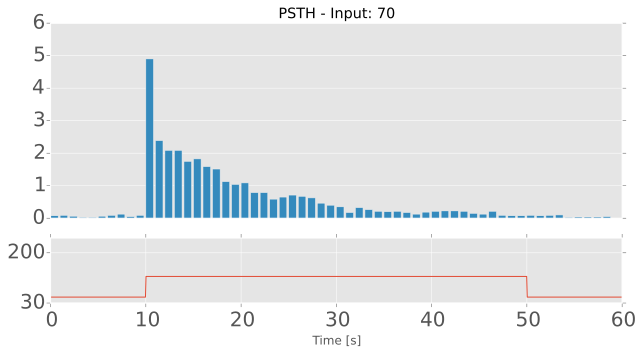

In [7]:
plotPTSH(before, after, h, s, it, DIRECTORY, S, N)

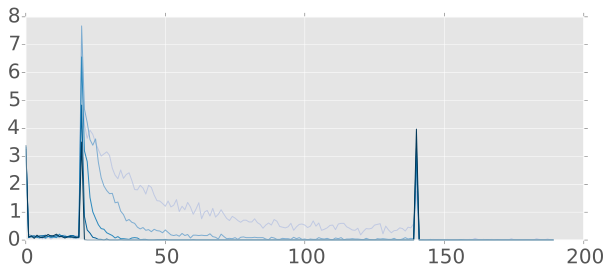

In [14]:
T = before+after

color=iter(cm.PuBu(np.linspace(0.3,1,5)))

for S in range(2,7):
    extension = "_S-%d_N-%d_T-%d" % (20*S, N, T)
    a = np.load(DIRECTORY + extension +'_data.npy')
    c=next(color)
    plt.plot(a[0],a[1], c=c)

[ 1.33611872  0.03889035  0.74933657]
[ 3.33400074  0.03245976  0.73983995]
[ 6.73339548  0.04569576  0.51083069]
[ 11.25169486   0.07015092   0.2606131 ]
[ 20.413818     0.11823738   0.09882235]
[  5.02647850e+01   2.05141793e-01   4.01162958e-02]
[  2.79090285e+02   3.80255422e-01   1.74914453e-02]
[  1.06377018e+04   7.50863471e-01   1.35072786e-02]


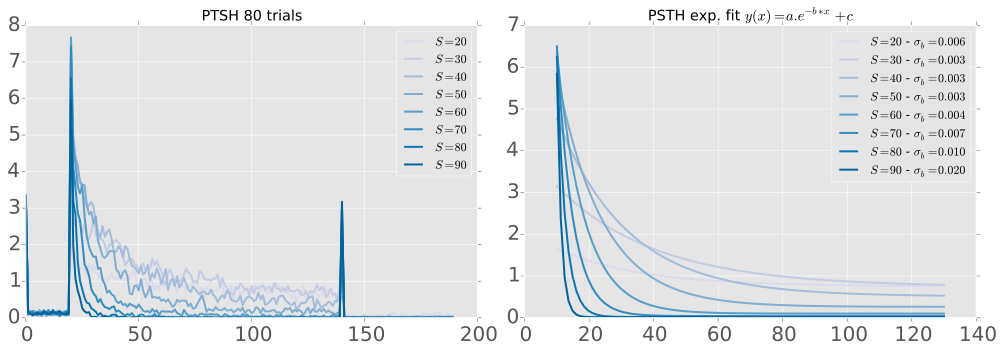

In [114]:
T = before+after
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
color=iter(cm.PuBu(np.linspace(0.2,1,10)))

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for S in range(2,10):
    extension = "_S-%d_N-%d_T-%d" % (10*S, N, T)
    a = np.load(DIRECTORY + extension +'_data.npy')
    c=next(color)
    ax1.plot(a[0],a[1],c=c, lw=2,label=r"$S="+str(10*S)+"$" )
    ax1.legend()
    ax1.set_title('PTSH 80 trials')
color=iter(cm.PuBu(np.linspace(0.2,1,10)))

for S in range(2,10):
    x = np.linspace(10,130,100)
    y = func(x, 2.5, 1.3, 0.5)
    extension = "_S-%d_N-%d_T-%d" % (10*S, N, T)
    a = np.load(DIRECTORY + extension +'_data.npy')
    yn = a[1][20:120]
    popt, pcov = curve_fit(func, x, yn)
    c=next(color)
    perr = np.sqrt(np.diag(pcov))
    ax2.plot(x, func(x, popt[0], popt[1], popt[2]), c=c, label=r"$S="+str(10*S)+ "$ - $\sigma_b = %.3f$" % perr[1], lw=2)
    ax2.legend()
    ax2.set_title(r'PSTH exp. fit $y(x) = a . e^{-b*x} + c$')
    print popt
    
fig.tight_layout()
fig.savefig(DIRECTORY + '_PTSH_curves.pdf')

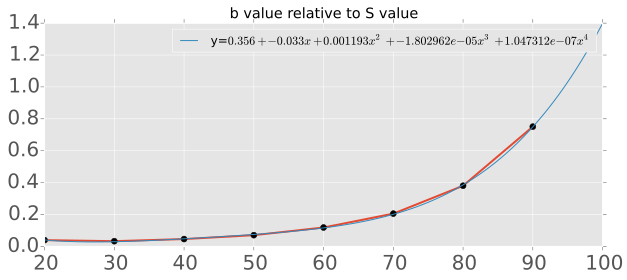

In [174]:
bList =[]

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

for S in range(2,10):
    x = np.linspace(10,130,100)
    y = func(x, 2.5, 1.3, 0.5)
    extension = "_S-%d_N-%d_T-%d" % (10*S, N, T)
    a = np.load(DIRECTORY + extension +'_data.npy')
    yn = a[1][20:120]
    popt, pcov = curve_fit(func, x, yn)
    bList.append(popt[1])

    
    
# def func(x, a, b, c):
#     return a * np.exp(1*b * x) + c

x = np.arange(20,100,10)
plt.plot(x,bList, lw=2)
plt.plot(x,bList, 'ko')
plt.title('b value relative to S value')

# y = func(x1, 0.01, 0.00001, 0)
# yn = np.array(bList)
# popt, pcov = curve_fit(func, x2, yn)
# plt.plot(x1, func(x1, popt[0], popt[1], popt[2]))
z = np.polyfit(x, bList, 4)

def pol(x,z):
    y=0
    for k in range(len(z)):
        y += z[len(z)-k-1]*x**k
    return y
x2 = np.arange(20,100,0.1)
plt.plot(x2, pol(x2,z), label=r'y=$%.3f + %.3f x+ %.6f x^2+ %e x^3 + %e x^4$' % (z[4],z[3],z[2],z[1],z[0]))
plt.legend()
plt.savefig(DIRECTORY + '_b_curve.pdf')

In [166]:
z

array([  1.04731199e-07,  -1.80296217e-05,   1.19288011e-03,
        -3.33019892e-02,   3.56417742e-01])

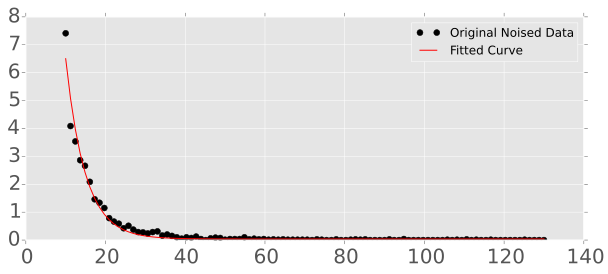

[  5.02647850e+01   2.05141793e-01   4.01162958e-02]


In [87]:
plt.figure()
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

print popt
perr = np.sqrt(np.diag(pcov))

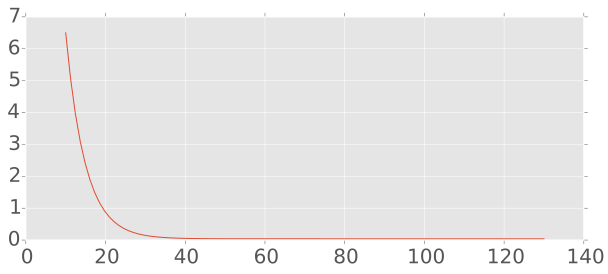

In [30]:
plt.plot(x, func(x, popt[0], popt[1], popt[2]))

In [2]:
spx = np.load('/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/TRN/data/spike_x_g-3_TImean-50_T-95000_Glob-1_dt-0.25_N-300_S-200_79.txt')
spy = np.load('/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/TRN/data/spike_y_g-3_TImean-50_T-95000_Glob-1_dt-0.25_N-300_S-200_79.txt')
plotRaster(spx,spy)

IOError: Failed to interpret file '/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/TRN/data/spike_x_g-3_TImean-50_T-95000_Glob-1_dt-0.25_N-300_S-200_79.txt' as a pickle

In [4]:

spikes_x, spikes_y, gamma, correlation, ssp1, stimulation = readSimulation(N, 79, G, S, d1, d2, d3, before, after)

In [24]:
plotRaster(spikes_x[0:20000],spikes_y[0:20000])

In [22]:
N = 100
G = 3
d1 = 2000
d2 = 10000
d3 = 5000
before = d1
after = d2+d3
S = 70
sigma = 30
title = r'N:%d Stim:%d $\gamma$:%f sig:%d' %(N, S, G, s)
runSimulation(N,0, G, S, d1, d2, d3, before, after, sigma)
spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation = readSimulation(N, 0, G, S, d1, d2, d3, before, after)
plotRasterGPU(spikes_x,spikes_y,title)

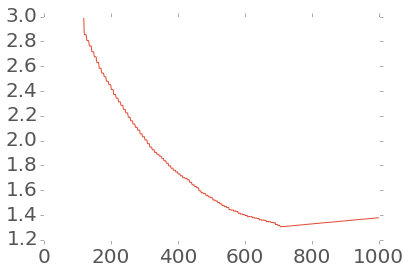

In [23]:
plt.plot(gamma)
# plt.plot(stimulation)

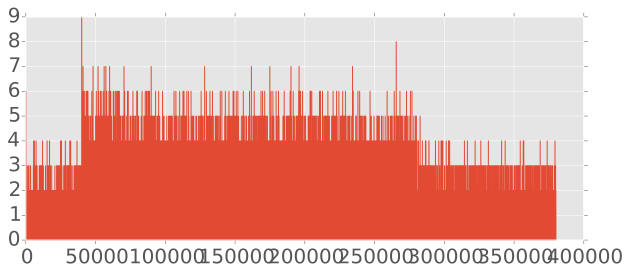

In [30]:
plt.plot(ssp1, '-')